In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from sklearn import preprocessing

In [6]:
df = pd.read_csv("data/fantasybaseball2019.csv")

df

,WK,R,HR,RBI,SB,AVG,OPS,W,SV,K,ERA,WHIP,QS,Wins,Loss,Ties
0,1,62,13,63,8,0.260,0.730,2,6,69,4.63,1.20,5,4,6,2
1,2,33,9,29,5,0.275,0.804,1,2,46,5.04,1.46,5,3,7,2
2,3,28,8,29,2,0.239,0.735,5,5,56,2.85,1.27,5,6,6,0
3,4,47,15,36,3,0.283,0.913,2,2,74,4.62,1.11,4,10,1,1
4,5,34,11,42,3,0.290,0.867,6,3,52,2.76,0.90,7,11,1,0
5,6,40,12,38,3,0.302,0.864,4,2,63,5.72,1.32,6,7,4,1
6,7,33,10,34,1,0.251,0.778,6,2,70,2.64,0.87,7,5,7,0
7,8,38,10,28,4,0.290,0.809,1,1,34,5.73,1.22,4,5,6,1
8,9,21,2,20,1,0.274,0.701,2,3,74,4.33,1.25,3,2,10,0
9,10,38,12,45,4,0.264,0.775,5,4,65,2.54,0.94,7,7,4,1


Remove weeks that are longer than 7 days

In [7]:
df = df[df.WK != 15]
df = df[df.WK != 1]
df

,WK,R,HR,RBI,SB,AVG,OPS,W,SV,K,ERA,WHIP,QS,Wins,Loss,Ties
1,2,33,9,29,5,0.275,0.804,1,2,46,5.04,1.46,5,3,7,2
2,3,28,8,29,2,0.239,0.735,5,5,56,2.85,1.27,5,6,6,0
3,4,47,15,36,3,0.283,0.913,2,2,74,4.62,1.11,4,10,1,1
4,5,34,11,42,3,0.290,0.867,6,3,52,2.76,0.90,7,11,1,0
5,6,40,12,38,3,0.302,0.864,4,2,63,5.72,1.32,6,7,4,1
6,7,33,10,34,1,0.251,0.778,6,2,70,2.64,0.87,7,5,7,0
7,8,38,10,28,4,0.290,0.809,1,1,34,5.73,1.22,4,5,6,1
8,9,21,2,20,1,0.274,0.701,2,3,74,4.33,1.25,3,2,10,0
9,10,38,12,45,4,0.264,0.775,5,4,65,2.54,0.94,7,7,4,1
10,11,40,11,37,4,0.291,0.867,4,1,53,4.31,1.19,5,5,7,1


Normalize each week using min-max normalization

In [8]:
categories = ['R', 'HR', 'RBI', 'SB', 'AVG', 'OPS', 'W', 'SV', 'K', 'ERA', 'WHIP', 'QS']

In [9]:
for category in categories:
    float_array = df[category].values.astype(float).reshape(-1, 1)
    min_max_scaler = preprocessing.MinMaxScaler()
    scaled_array = min_max_scaler.fit_transform(float_array)
    df[category] = scaled_array
    
df

,WK,R,HR,RBI,SB,AVG,OPS,W,SV,K,ERA,WHIP,QS,Wins,Loss,Ties
1,2,0.461538,0.538462,0.36,1.00,0.644737,0.497696,0.0,0.4,0.285714,0.783699,0.951613,0.50,3,7,2
2,3,0.269231,0.461538,0.36,0.25,0.171053,0.179724,0.8,1.0,0.523810,0.097179,0.645161,0.50,6,6,0
3,4,1.000000,1.000000,0.64,0.50,0.750000,1.000000,0.2,0.4,0.952381,0.652038,0.387097,0.25,10,1,1
4,5,0.500000,0.692308,0.88,0.50,0.842105,0.788018,1.0,0.6,0.428571,0.068966,0.048387,1.00,11,1,0
5,6,0.730769,0.769231,0.72,0.50,1.000000,0.774194,0.6,0.4,0.690476,0.996865,0.725806,0.75,7,4,1
6,7,0.461538,0.615385,0.56,0.00,0.328947,0.377880,1.0,0.4,0.857143,0.031348,0.000000,1.00,5,7,0
7,8,0.653846,0.615385,0.32,0.75,0.842105,0.520737,0.0,0.2,0.000000,1.000000,0.564516,0.25,5,6,1
8,9,0.000000,0.000000,0.00,0.00,0.631579,0.023041,0.2,0.6,0.952381,0.561129,0.612903,0.00,2,10,0
9,10,0.653846,0.769231,1.00,0.75,0.500000,0.364055,0.8,0.8,0.738095,0.000000,0.112903,1.00,7,4,1
10,11,0.730769,0.692308,0.68,0.75,0.855263,0.788018,0.6,0.2,0.452381,0.554859,0.516129,0.50,5,7,1


Calculate the score for each week

In [10]:
score = 0.0
df['SCORE'] = np.nan

for index, row in df.iterrows():
    for category in categories:
        score += row[category]
    df.at[index, 'SCORE'] = score
    score = 0.0
    
df

,WK,R,HR,RBI,SB,AVG,OPS,W,SV,K,ERA,WHIP,QS,Wins,Loss,Ties,SCORE
1,2,0.461538,0.538462,0.36,1.00,0.644737,0.497696,0.0,0.4,0.285714,0.783699,0.951613,0.50,3,7,2,6.423459
2,3,0.269231,0.461538,0.36,0.25,0.171053,0.179724,0.8,1.0,0.523810,0.097179,0.645161,0.50,6,6,0,5.257695
3,4,1.000000,1.000000,0.64,0.50,0.750000,1.000000,0.2,0.4,0.952381,0.652038,0.387097,0.25,10,1,1,7.731515
4,5,0.500000,0.692308,0.88,0.50,0.842105,0.788018,1.0,0.6,0.428571,0.068966,0.048387,1.00,11,1,0,7.348355
5,6,0.730769,0.769231,0.72,0.50,1.000000,0.774194,0.6,0.4,0.690476,0.996865,0.725806,0.75,7,4,1,8.657341
6,7,0.461538,0.615385,0.56,0.00,0.328947,0.377880,1.0,0.4,0.857143,0.031348,0.000000,1.00,5,7,0,5.632241
7,8,0.653846,0.615385,0.32,0.75,0.842105,0.520737,0.0,0.2,0.000000,1.000000,0.564516,0.25,5,6,1,5.716589
8,9,0.000000,0.000000,0.00,0.00,0.631579,0.023041,0.2,0.6,0.952381,0.561129,0.612903,0.00,2,10,0,3.581033
9,10,0.653846,0.769231,1.00,0.75,0.500000,0.364055,0.8,0.8,0.738095,0.000000,0.112903,1.00,7,4,1,7.488131
10,11,0.730769,0.692308,0.68,0.75,0.855263,0.788018,0.6,0.2,0.452381,0.554859,0.516129,0.50,5,7,1,7.319727


Plot the score for each week with a label for the week record

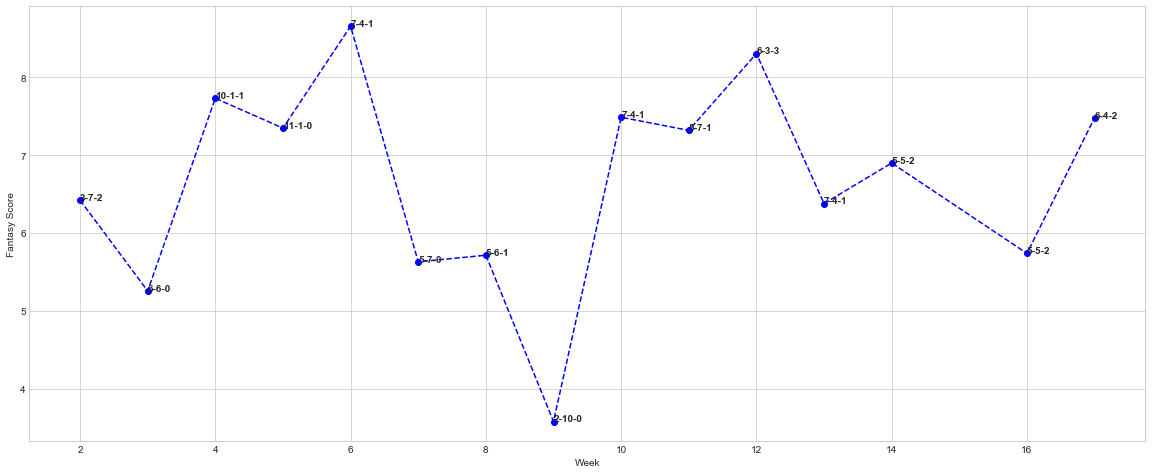

In [11]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

plt.plot(df['WK'], df['SCORE'], '--bo')
plt.xlabel('Week')
plt.ylabel('Fantasy Score')

for index, row in df.iterrows():
    ax.annotate('%d-%d-%d' % (row['Wins'], row['Loss'], row['Ties']), 
                (row['WK'], row['SCORE']), weight = 'bold')

plt.show()